## 13.1 计算机视觉

### 13.1.1 常用的图像增广方法

In [1]:
import torch
import torchvision
from torch import nn
import numpy as np
import os
from d2l import torch as d2l
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
os.environ["KMP_DUPLIfrom d2l import mxnet as d2lCATE_LIB_OK"] = "TRUE"

In [27]:
def use_svg_display():
    # 设置Matplotlib使用SVG格式显示
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """Set matplotlib figure size."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): 
    '''绘制图像列表'''
    figsize=((num_cols * scale, num_rows * scale))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):    #zip(axes, imgs)：将两个列表配对；enumerate()：添加索引
        if torch.is_tensor(img): # 图片张量
            ax.imshow(img.numpy())   #将张量转换为图像
        else:
        # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)    #隐藏坐标轴
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

def accuracy(y_hat, y): 
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
        # print(y_hat)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

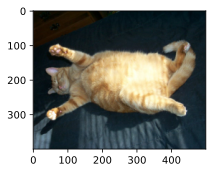

In [3]:
set_figsize()
img = Image.open("D:/文档/python/pytorch DL/img/cat1.jpg")
plt.imshow(img);

In [4]:
def apply (img,aug,num_rows=2,num_cols=4,scale=1.5):
    Y=[aug(img) for _ in range(num_rows*num_cols)]
    show_images(Y,num_rows,num_cols,scale=scale)
 

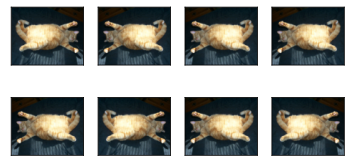

In [5]:
#左右翻转
import torchvision
apply(img,torchvision.transforms.RandomHorizontalFlip())

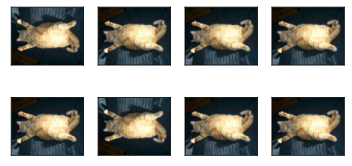

In [6]:
#上下翻转
apply(img,torchvision.transforms.RandomVerticalFlip())

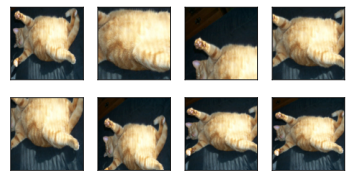

In [ ]:
#随机裁剪
shape_aug=torchvision.transforms.RandomResizedCrop(
    (200,200),scale=(0.1,1),ratio=(0.5,2)
)
apply(img,shape_aug)

# torchvision.transforms.RandomResizedCrop(
#     size,
#     scale=(0.08, 1.0),
#     ratio=(3.0/4.0, 4.0/3.0),
#     interpolation=InterpolationMode.BILINEAR
# )
# size (int or sequence):
# 输出图像的尺寸。
# 如果是一个整数，输出将是 (size, size) 的正方形。
# 如果是一个类似 (h, w) 的序列，输出将被精确调整为 h x w。

# scale (tuple of float):
# 指定随机裁剪区域面积相对于原始图像面积的比例范围。
# 例如 (0.08, 1.0) 意味着裁剪出的区域面积将在原图面积的 8% 到 100% 之间随机选择。这是一个经验值，最初在ResNet等论文中被使用。

# ratio (tuple of float):
# 指定随机裁剪区域的宽高比范围。
# 例如 (3./4., 4./3.) 意味着裁剪区域的宽高比将在 0.75 到 1.33 之间随机选择。这保证了不会裁剪出过于扁平或细长的区域。

# interpolation (InterpolationMode):
# 当将裁剪出的区域缩放到 size 时，使用的插值算法。
# 常见选项：InterpolationMode.BILINEAR（双线性插值，默认），InterpolationMode.BICUBIC（双三次插值，质量更好但更慢），InterpolationMode.NEAREST（最近邻插值）。
# 对于照片等自然图像，通常使用 BILINEAR 或 BICUBIC。

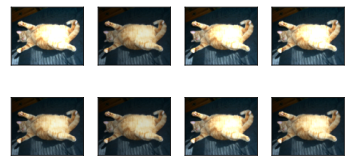

In [ ]:
#改变亮度
apply(img,torchvision.transforms.ColorJitter(brightness=0.5,contrast=0,saturation=0,hue=0))


# brightness (float or tuple)
# 亮度调整强度
# 如果是浮点数：从 [max(0, 1 - brightness), 1 + brightness] 中随机选择系数
# 如果是元组 (min, max)：直接从该范围选择系数
# 示例：brightness=0.2 表示亮度在原始亮度的 80% 到 120% 之间变化

# contrast (float or tuple)
# 对比度调整强度
# 参数格式同 brightness
# 示例：contrast=0.3 表示对比度在原始对比度的 70% 到 130% 之间变化

# saturation (float or tuple)
# 饱和度调整强度
# 参数格式同 brightness
# 示例：saturation=0.4 表示饱和度在原始饱和度的 60% 到 140% 之间变化

# hue (float or tuple)
# 色调调整强度
# 必须是 [-0.5, 0.5] 范围内的值
# 推荐使用较小的值，如 0.1 或 0.2
# 示例：hue=0.1 表示色调在 [-0.1, 0.1] 范围内调整

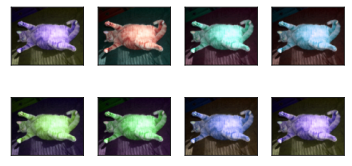

In [11]:
#改变色调
apply(img,torchvision.transforms.ColorJitter(brightness=0,contrast=0,saturation=0,hue=0.5))

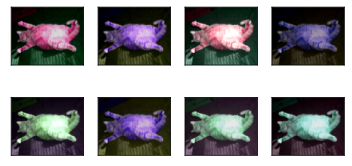

In [12]:
#同时更改图像的亮度（brightness），对比度（contrast），饱和度（saturation）和色调（hue）
color_aug=torchvision.transforms.ColorJitter(
    brightness=0.5,contrast=0.5,saturation=0.5,hue=0.5
)
apply(img,color_aug)

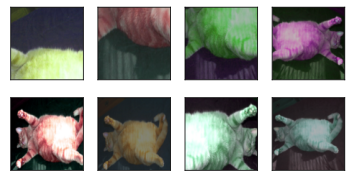

In [13]:
#结合多种图像增广方法
augs=torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(),color_aug,shape_aug])
apply(img,augs)

### 13.1.2 使用图像增广进行训练

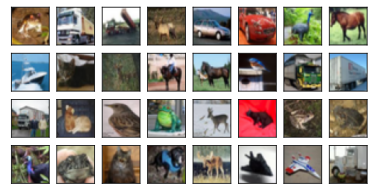

In [14]:
all_images = torchvision.datasets.CIFAR10(train=True, root="../data",
    download=True)
show_images([all_images[i][0] for i in range(32)], 4, 8, scale=0.8);

In [15]:
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor()])
test_augs = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])


In [ ]:
#辅助函数，以便于读取图像和应用图像增广
def load_cifar10(is_train, augs, batch_size):
    dataset = torchvision.datasets.CIFAR10(root="../data", train=is_train,
                                           transform=augs, download=True)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
    shuffle=is_train, num_workers=4)
    return dataloader

In [25]:
#多GPU计算



def train_batch_ch13(net,X,y,loss,trainer,devices):
    '''用多GPU进行小批量训练'''
    if isinstance(X,list):
        #微调BERT中所需
        X=[x.to(devices[0]) for x in X]
    else:
        X=X.to(devices[0])
    y=y.to(devices[0])
    net.train()
    trainer.zero_grad()
    pred=net(X)
    l=loss(pred,y)
    l.sum().backward()
    trainer.step()
    train_loss_sum=l.sum()
    train_acc_sum=accuracy(pred,y)
    return train_loss_sum,train_acc_sum

In [21]:
def train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
               devices=d2l.try_all_gpus()):
    timer, num_batches = d2l.Timer(), len(train_iter)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1],
                            legend=['train loss', 'train acc', 'test acc'])
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(4)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch_ch13(net, features, labels, loss, trainer,
                                      devices)
            metric.add(l, acc, labels.shape[0], labels.numel())
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(
                    epoch + (i + 1) / num_batches,
                    (metric[0] / metric[2], metric[1] / metric[3], None))
        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {metric[0] / metric[2]:.3f}, train acc '
          f'{metric[1] / metric[3]:.3f}, test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on '
          f'{str(devices)}')

In [29]:
#定义 train_with_data_aug 函数，使用图像增广来训练模型
batch_size, devices, net = 256, d2l.try_all_gpus(), d2l.resnet18(10, 3)

def init_weights(m):
    if type(m) in [nn.Linear, nn.Conv2d]:
        nn.init.xavier_uniform_(m.weight)

net.apply(init_weights)

def train_with_data_aug(train_augs, test_augs, net, lr=0.001):
    train_iter = load_cifar10(True, train_augs, batch_size)
    test_iter = load_cifar10(False, test_augs, batch_size)
    loss = nn.CrossEntropyLoss(reduction="none")
    trainer = torch.optim.Adam(net.parameters(), lr=lr)
    train_ch13(net, train_iter, test_iter, loss, trainer, 10, devices)

loss 0.167, train acc 0.942, test acc 0.817
1687.3 examples/sec on [device(type='cuda', index=0)]


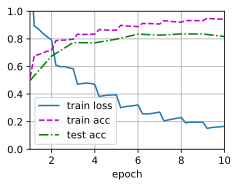

In [30]:
train_with_data_aug(train_augs, test_augs, net)